# Enhanced Machine Learning Model for Heart Disease Prediction  

In [47]:
# Module Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [48]:
# Reading the cleveland dataset
cols = ['Age', 'Sex', 'CP', 'Trestbps', 'Cholestrol', 'Fbs', 'Restecg', 
        'Thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df_cleveland = pd.read_csv("cleveland.csv", names=cols, header=0)
df_cleveland.head()
# Dataset has a dimesnion of 303 * 14 ( rows and columns) and below are the top 5 rows = 4242

,Age,Sex,CP,Trestbps,Cholestrol,Fbs,Restecg,Thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0




### Features of the dataset

###### age                  : age of the patient (years)

###### sex                  : gender of the patient (1 = male; 0 = female)

###### cp                     : chest pain type  
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

###### trestbps            : resting blood pressure (in mm Hg on admission to the hospital)

###### chol                  : serum cholesterol in mg/dl

###### fbs                   : fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

###### restecg            : resting electrocardiographic results  
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

###### thalach             : maximum heart rate achieved

###### exang              : exercise induced angina (1 = yes; 0 = no)

###### oldpeak            : ST depression induced by exercise relative to rest

###### slope               : the slope of the peak exercise ST segment  
- Value 0: upsloping
- Value 1: flat
- Value 2: downsloping

###### ca                    : number of major vessels (0-3) colored by fluoroscopy

###### thal                  : thalassemia  
- Value 1: normal
- Value 2: fixed defect
- Value 3: reversible defect

###### target               : diagnosis of heart disease (angiographic disease status)
- Value 0: < 50% diameter narrowing
- Value 1: > 50% diameter narrowing



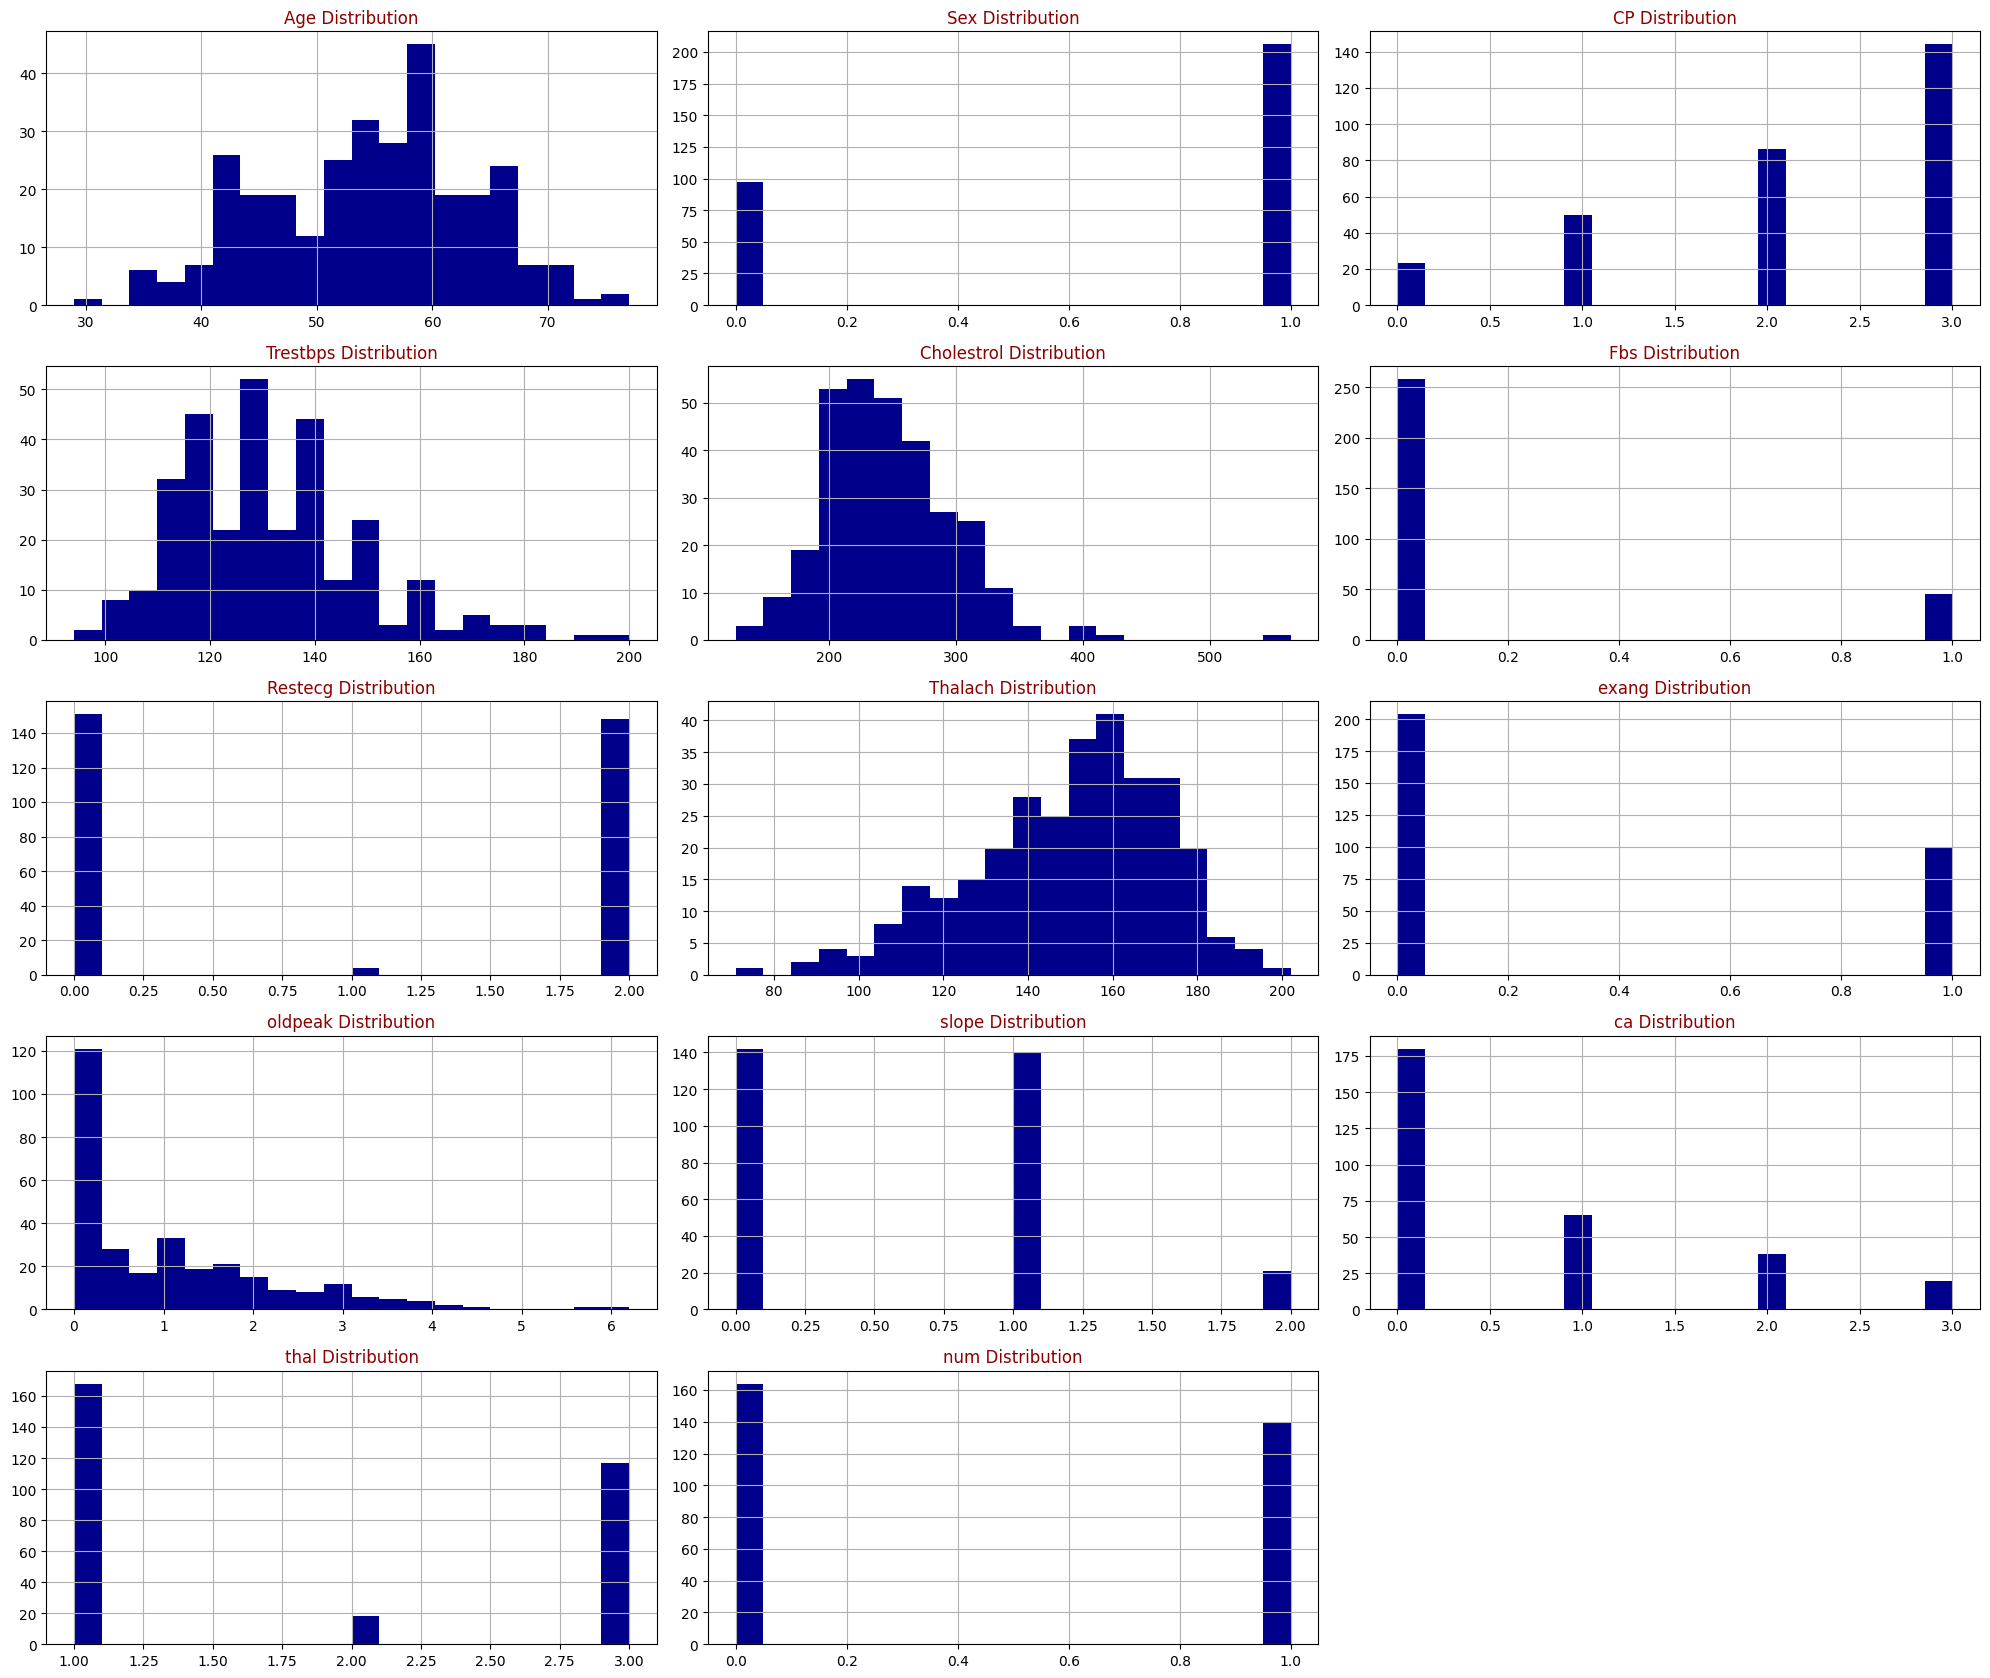

In [49]:
# Function to draw histograms
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features):
        if dataframe[feature].dtype in ['int64', 'float64']:  # Check if column is numerical
            ax = fig.add_subplot(rows, cols, i + 1)
            dataframe[feature].hist(bins=20, ax=ax, facecolor='darkblue')
            ax.set_title(feature + " Distribution", color='DarkRed')
        else:
            print(f"Skipping non-numerical feature: {feature}")
    
    fig.tight_layout()
    plt.show()

# Plot histograms
draw_histograms(df_cleveland, df_cleveland.columns, 6, 3)


## Data Preprocessing
#### Data preprocessing involves multiclass variable and binary classification which is converting medical records into the numerical diagnosis values. As we are conisdering the processed cleveland dataset with numerical diagnosis values, we can skip that step


In [50]:
df_cleveland = df_cleveland.dropna(how="any")
# six rows are dropped as they have null values and now we have a data set of 297 * 14
df_cleveland.num.value_counts()

num
0    164
1    139
Name: count, dtype: int64

In [51]:
df_cleveland["num"].replace(dict.fromkeys([2,3,4,5], 1), inplace=True)
df_cleveland.num.value_counts()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14328\1124301634.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleveland["num"].replace(dict.fromkeys([2,3,4,5], 1), inplace=True)


num
0    164
1    139
Name: count, dtype: int64

In [52]:
# Splitting the dataset into the Training set and Test set
# 85 percent - Training , 15 percent for test
X = df_cleveland.iloc[:,:-1].values
y = df_cleveland.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [53]:
# Feature Extraction
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

## Linear regression 

In [54]:
##Linear regression 
from sklearn.linear_model import LogisticRegression
model_lr  =LogisticRegression()
model_lr.fit(X_train,y_train)
#Predict the test set results
y_lr_pred=model_lr.predict(X_test)
#checking the accuracy for predicted results
print("Confusion Matrix of Linear Regression:")
print(confusion_matrix(y_test, y_lr_pred))
print("Accuracy of Linear Regression :", accuracy_score(y_test,y_lr_pred))
print("Classifcation Report : ")
print(classification_report(y_test, y_lr_pred))
print(y_test)
print(y_lr_pred)

Confusion Matrix of Linear Regression:
[[21  5]
 [ 7 13]]
Accuracy of Linear Regression : 0.7391304347826086
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        26
           1       0.72      0.65      0.68        20

    accuracy                           0.74        46
   macro avg       0.74      0.73      0.73        46
weighted avg       0.74      0.74      0.74        46

[0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 1]
[0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0]


## Random Forest 

In [26]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=30)
model_rf.fit(X_train,y_train)
y_rf_pred = model_rf.predict(X_test)

print("Confusion Matrix of Random Forest:")
print(confusion_matrix(y_test, y_rf_pred))
print("Accuracy of Random Forest :", accuracy_score(y_test,y_rf_pred))
print("Classifcation Report : ")
print(classification_report(y_test, y_rf_pred))
print(y_test)
print(y_rf_pred)

Confusion Matrix of Random Forest:
[[22  4]
 [ 7 13]]
Accuracy of Random Forest : 0.7608695652173914
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        26
           1       0.76      0.65      0.70        20

    accuracy                           0.76        46
   macro avg       0.76      0.75      0.75        46
weighted avg       0.76      0.76      0.76        46

[0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 1]
[0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0]


### SVM

In [55]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


model_svm = svm.SVC()
model_svm.fit(X_train,y_train)
y_svm_pred = model_svm.predict(X_test)

print("Confusion Matrix of SVM:")
print(confusion_matrix(y_test, y_svm_pred))
print("Accuracy of SVM :", accuracy_score(y_test,y_svm_pred))
print("Classifcation Report : ")
print(classification_report(y_test, y_svm_pred))
print(y_test)
print(y_svm_pred)

Confusion Matrix of SVM:
[[23  3]
 [ 7 13]]
Accuracy of SVM : 0.782608695652174
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        26
           1       0.81      0.65      0.72        20

    accuracy                           0.78        46
   macro avg       0.79      0.77      0.77        46
weighted avg       0.79      0.78      0.78        46

[0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 1]
[0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 1 0 0 0]


## PCA(Principle component analysis)

Explained variance ratio of each component: [0.23480502 0.12865929]
Original number of features: 13
Reduced number of features: 2


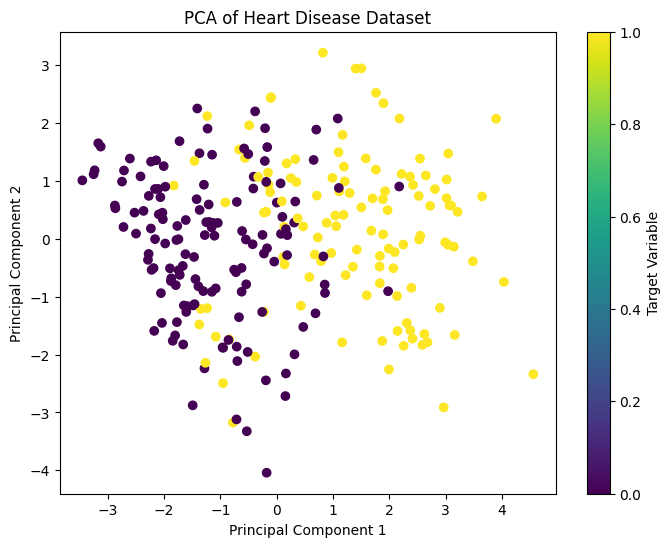

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


# Apply PCA for feature extraction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print explained variance ratio
print("Explained variance ratio of each component:", pca.explained_variance_ratio_)
print("Original number of features:", X_train.shape[1])
print("Reduced number of features:", X_train_pca.shape[1])

# Optionally, you can also visualize the PCA result
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.colorbar(scatter, label='Target Variable')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Heart Disease Dataset')
plt.show()


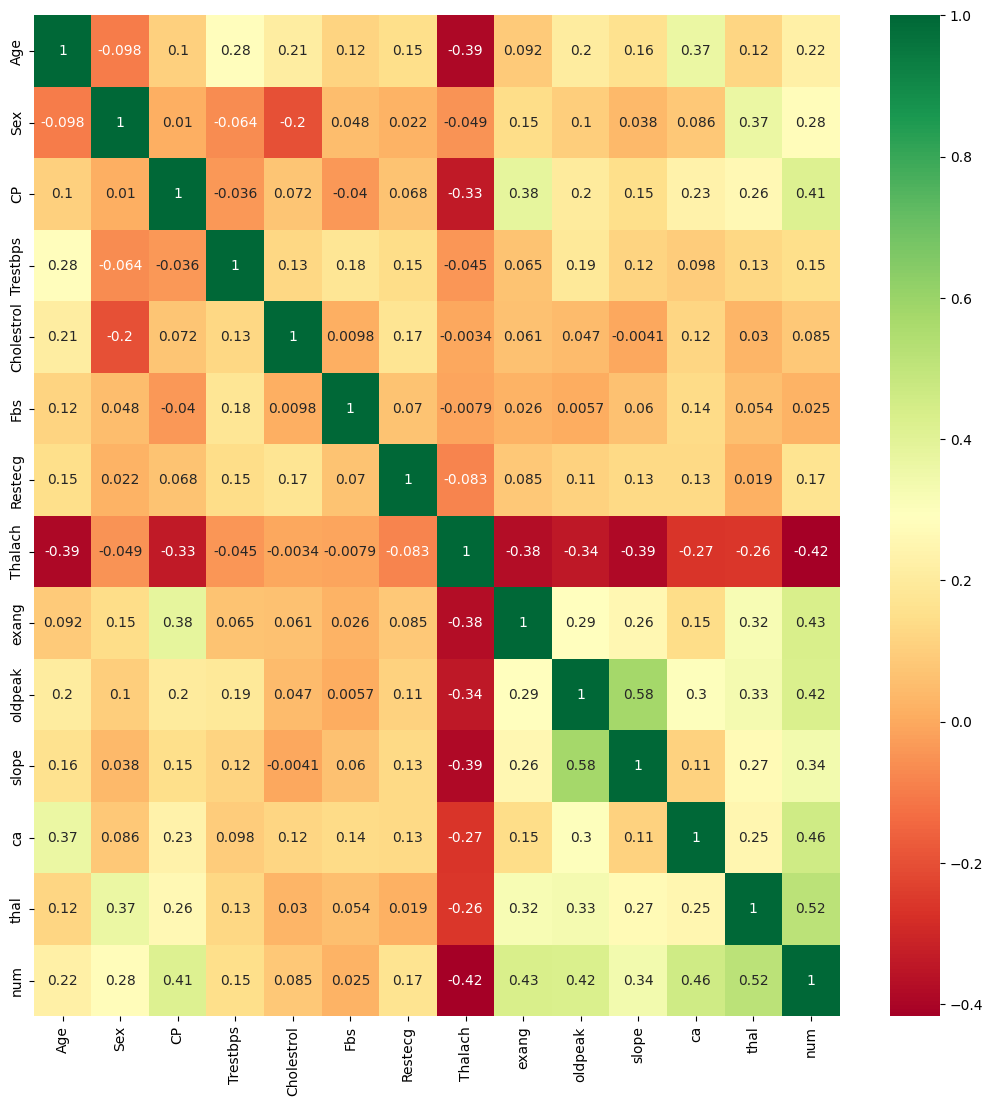

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = df_cleveland.corr()
top_corr_features = correlation.index
plt.figure(figsize=(13,13))
#plot heat map
g=sns.heatmap(df_cleveland[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [58]:


# Assuming df_cleveland is already defined
print(df_cleveland.columns)

# Check if 'num' column exists and is correctly named
if 'num' in df_cleveland.columns:
    target = df_cleveland['num']
    df_cleveland = df_cleveland.drop(['Sex', 'Fbs', 'Restecg', 'slope', 'Cholestrol', 'Age', 'Trestbps', 'num'], axis=1)
else:
    print("'num' column is not present in the DataFrame. Available columns are:", df_cleveland.columns)


Index(['Age', 'Sex', 'CP', 'Trestbps', 'Cholestrol', 'Fbs', 'Restecg',
       'Thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [59]:
df_cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CP       303 non-null    int64  
 1   Thalach  303 non-null    int64  
 2   exang    303 non-null    int64  
 3   oldpeak  303 non-null    float64
 4   ca       303 non-null    int64  
 5   thal     303 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 14.3 KB


In [60]:
i_train, i_test, j_train, j_test = train_test_split(df_cleveland, target, test_size=0.3, random_state=10)

In [61]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
np.random.seed(1)

## Random Forest

In [33]:
model_rf_2 = RandomForestClassifier(n_estimators=500)
model_rf_2.fit(i_train,j_train)
y_rf_pred_2 = model_rf_2.predict(i_test)

print("Confusion Matrix of Random Forest after FS:")
print(confusion_matrix(j_test, y_rf_pred_2))
print("Accuracy of Random Forest :", accuracy_score(j_test, y_rf_pred_2))
print("Classifcation Report : ")
print(classification_report(j_test, y_rf_pred_2))
print(j_test)
print(y_rf_pred_2)

Confusion Matrix of Random Forest after FS:
[[40  5]
 [ 8 38]]
Accuracy of Random Forest : 0.8571428571428571
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        45
           1       0.88      0.83      0.85        46

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

246    1
183    0
229    1
126    1
184    1
      ..
69     1
21     0
210    0
78     0
174    1
Name: num, Length: 91, dtype: int64
[1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1]


# Linear regression 

In [62]:
model_lr_2  =LogisticRegression()
model_lr_2.fit(i_train,j_train)
#Predict the test set results
y_lr_pred_2=model_lr_2.predict(i_test)
#checking the accuracy for predicted results
print("Confusion Matrix of Linear Regression:")
print(confusion_matrix(j_test, y_lr_pred_2))
print("Accuracy of Linear Regression :", accuracy_score(j_test,y_lr_pred_2))
print("Classifcation Report : ")
print(classification_report(j_test, y_lr_pred_2))
print(j_test)
print(y_lr_pred_2)

Confusion Matrix of Linear Regression:
[[42  3]
 [ 7 39]]
Accuracy of Linear Regression : 0.8901098901098901
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        45
           1       0.93      0.85      0.89        46

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91

246    1
183    0
229    1
126    1
184    1
      ..
69     1
21     0
210    0
78     0
174    1
Name: num, Length: 91, dtype: int64
[1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1]


## Svm

In [63]:
# SVM after feature selection
pipeline_svm = make_pipeline(svm.SVC(probability=True, kernel='linear', class_weight='balanced'))
model_svm_2 = GridSearchCV(pipeline_svm,
 param_grid = {'svc__C': [0.01, 0.1, 1]}, 
 cv = kfolds,
 verbose=1, 
 n_jobs=-1)
model_svm_2.fit(i_train,j_train)
y_svm_pred_2 = model_svm_2.predict(i_test)

print("Confusion Matrix of SVM:")
print(confusion_matrix(j_test, y_svm_pred_2))
print("Accuracy of SVM :", accuracy_score(j_test,y_svm_pred_2))
print("Classifcation Report : ")
print(classification_report(j_test, y_svm_pred_2))
print(j_test)
print(y_svm_pred_2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Confusion Matrix of SVM:
[[41  4]
 [ 8 38]]
Accuracy of SVM : 0.8681318681318682
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        45
           1       0.90      0.83      0.86        46

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

246    1
183    0
229    1
126    1
184    1
      ..
69     1
21     0
210    0
78     0
174    1
Name: num, Length: 91, dtype: int64
[1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1]


## Enhanced Model 

### Linear Regression and SVM

In [64]:
from sklearn.ensemble import VotingClassifier

estimators=[ ('lr', model_lr_2), ('svm', model_svm_2)]

majority_voting = VotingClassifier(estimators, voting='hard')
#fit model to training data
majority_voting.fit(i_train, j_train)

maj_pred = majority_voting.predict(i_test)
print("Confusion Matrix of Ensembler:")
print(confusion_matrix(j_test, maj_pred))
print("Accuracy of Ensemble :", accuracy_score(j_test, maj_pred))
print("Classifcation Report : ")
print(classification_report(j_test, maj_pred))
print(j_test)
print(maj_pred)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Confusion Matrix of Ensembler:
[[42  3]
 [ 8 38]]
Accuracy of Ensemble : 0.8791208791208791
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        45
           1       0.93      0.83      0.87        46

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

246    1
183    0
229    1
126    1
184    1
      ..
69     1
21     0
210    0
78     0
174    1
Name: num, Length: 91, dtype: int64
[1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1]


## Linear Regression and Random Forest 

In [65]:
from sklearn.ensemble import VotingClassifier

estimators=[ ('lr', model_lr_2), ('rf', model_rf_2)]

majority_voting = VotingClassifier(estimators, voting='hard')
#fit model to training data
majority_voting.fit(i_train, j_train)

maj_pred = majority_voting.predict(i_test)
print("Confusion Matrix of Ensembler:")
print(confusion_matrix(j_test, maj_pred))
print("Accuracy of Ensemble :", accuracy_score(j_test, maj_pred))
print("Classifcation Report : ")
print(classification_report(j_test, maj_pred))
print(j_test)
print(maj_pred)

Confusion Matrix of Ensembler:
[[42  3]
 [10 36]]
Accuracy of Ensemble : 0.8571428571428571
Classifcation Report : 
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        45
           1       0.92      0.78      0.85        46

    accuracy                           0.86        91
   macro avg       0.87      0.86      0.86        91
weighted avg       0.87      0.86      0.86        91

246    1
183    0
229    1
126    1
184    1
      ..
69     1
21     0
210    0
78     0
174    1
Name: num, Length: 91, dtype: int64
[1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1]


### LR + SVM + RF

In [74]:
estimators = [
    ('lr', model_lr_2),
    ('rf', model_rf_2),
    ('svm', model_svm_2)
]

majority_voting = VotingClassifier(estimators, voting='hard')

majority_voting.fit(i_train, j_train)

maj_pred = majority_voting.predict(i_test)

print("Confusion Matrix of Ensembler:")
print(confusion_matrix(j_test, maj_pred))
print("Accuracy of Ensemble :", accuracy_score(j_test, maj_pred))
print("Classification Report :")
print(classification_report(j_test, maj_pred))

print("Actual labels:")
print(j_test)
print("Predicted labels:")
print(maj_pred)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Confusion Matrix of Ensembler:
[[42  3]
 [ 7 39]]
Accuracy of Ensemble : 0.8901098901098901
Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        45
           1       0.93      0.85      0.89        46

    accuracy                           0.89        91
   macro avg       0.89      0.89      0.89        91
weighted avg       0.89      0.89      0.89        91

Actual labels:
246    1
183    0
229    1
126    1
184    1
      ..
69     1
21     0
210    0
78     0
174    1
Name: num, Length: 91, dtype: int64
Predicted labels:
[1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1]
